In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
task = "Ackley"
dim = 200
number_of_seeds = 3

# Default parameters
n_init = 200
batch_size = 100
buffer_size = 500
diffusion_steps = 30
alpha = 1e-5
gamma = 1.0
num_ensembles = 5
local_search = "True"
local_search_epochs = 10
reweighting = "exp"
filtering = "True"
training_posterior = "both"
num_proposals = 10
num_posterior_epochs = 50
max_evals = 10000 # 10000
save_len = 10000 # 10000

In [25]:
ablation_name = "Reweighting"
reweighting_list = ['exp', 'uniform', 'value', 'rank']

In [26]:
performance= np.zeros((number_of_seeds, len(reweighting_list), max_evals))
for seed in range(number_of_seeds):
    for i in range(len(reweighting_list)):
        reweighting = reweighting_list[i]
        if i == 0:
            folder_name = f"results/abalations/Default"
        else:
            folder_name = f"results/abalations/{ablation_name}"
        data = np.load(f"{folder_name}/{task}_{dim}_{seed}_{n_init}_{batch_size}_{buffer_size}_{diffusion_steps}_{alpha}_{gamma}_{num_ensembles}_{local_search}_{local_search_epochs}_{reweighting}_{filtering}_{training_posterior}_{num_proposals}_{num_posterior_epochs}_{max_evals}_{save_len}.npy")
        data = np.maximum.accumulate(data).flatten()
        performance[seed, i] = data

In [27]:
performance= np.zeros((number_of_seeds, len(filtering_list), max_evals))
for seed in range(number_of_seeds):
    for i in range(len(filtering_list)):
        filtering = filtering_list[i]
        local_search = local_search_list[i]
        local_search_epochs = local_search_epochs_list[i]
        num_posterior_epochs = num_posterior_epochs_list[i]
        
        if i == 0:
            folder_name = f"results/abalations/Default"
        else:
            folder_name = f"results/abalations/{ablation_name}"
        data = np.load(f"{folder_name}/{task}_{dim}_{seed}_{n_init}_{batch_size}_{buffer_size}_{diffusion_steps}_{alpha}_{gamma}_{num_ensembles}_{local_search}_{local_search_epochs}_{reweighting}_{filtering}_{training_posterior}_{num_proposals}_{num_posterior_epochs}_{max_evals}_{save_len}.npy")
        data = np.maximum.accumulate(data).flatten()
        performance[seed, i] = data

NameError: name 'filtering_list' is not defined

In [38]:
names = ["Exp (Default)", "Uniform", "Value", "Rank"]
colors = ["royalblue", "darkorange", "forestgreen", "firebrick"]

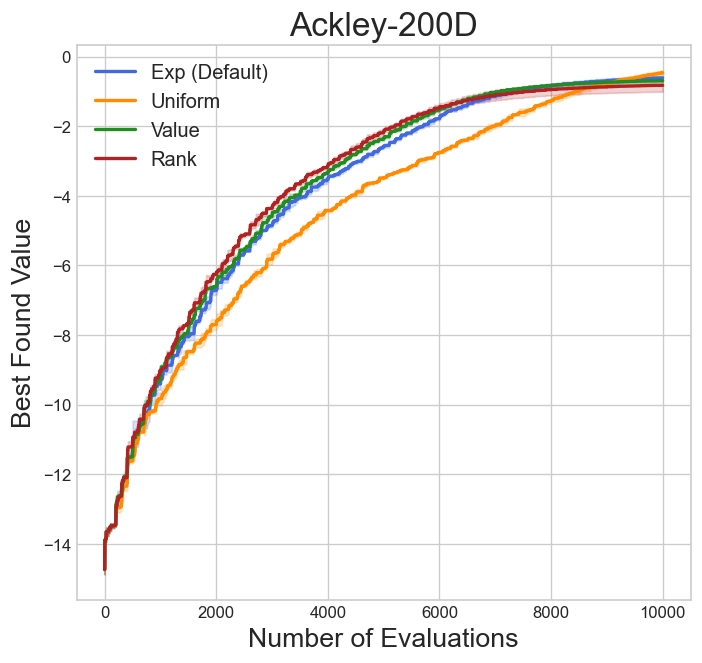

In [44]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(6.6, 6.0),dpi=120)

for i in range(len(names)):
    mean = np.mean(performance[:, i], axis=0)
    std = np.std(performance[:, i], axis=0)
    plt.plot(mean, label=names[i], color=colors[i], linewidth=2.0)
    plt.fill_between(np.arange(len(mean)), mean-std, mean+std, color=colors[i], alpha=0.2)

plt.title(f"{task}-{dim}D", fontsize=20)
plt.xlabel("Number of Evaluations", fontsize=16)
plt.ylabel("Best Found Value", fontsize=16)
plt.legend(fontsize=12)

In [ ]:
# Specify the parameters for the experiment (ex. Phase 2 Ablation)
ablation_name = "Gamma"
gamma_list = [0.1, 0.5, 1.0, 3.0, 5.0, 10.0]
# filtering_list = ["True", "False", "False", "False"]
# local_search_list = ["True", "True", "False", "False"]
# local_search_epochs_list = [10, 10, 0, 0]
# num_posterior_epochs_list = [50, 50, 50, 0]

In [ ]:
performance= np.zeros((number_of_seeds, len(gamma_list), max_evals))
for seed in range(number_of_seeds):
    for i in range(len(gamma_list)):
        gamma = gamma_list[i]
        if i == 0:
            folder_name = f"results/abalations/Default"
        else:
            folder_name = f"results/abalations/{ablation_name}"
        data = np.load(f"{folder_name}/{task}_{dim}_{seed}_{n_init}_{batch_size}_{buffer_size}_{diffusion_steps}_{alpha}_{gamma}_{num_ensembles}_{local_search}_{local_search_epochs}_{reweighting}_{filtering}_{training_posterior}_{num_proposals}_{num_posterior_epochs}_{max_evals}_{save_len}.npy")
        data = np.maximum.accumulate(data).flatten()
        performance[seed, i] = data

FileNotFoundError: [Errno 2] No such file or directory: 'results/abalations/Default/Ackley_200_0_200_100_500_30_1e-05_0.1_5_True_10_rank_True_both_10_50_10000_10000.npy'